# load dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('customer_churn_large_dataset (1).xlsx')


In [3]:
df.shape

(100000, 9)

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [8]:
len(df[df.Churn==1])

49779

In [9]:
len(df[df.Churn==0])

50221

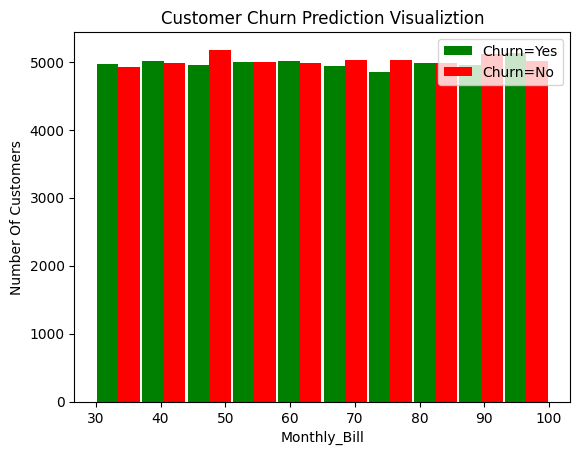

In [50]:
import matplotlib.pyplot as  plt
tenure_churn_no = df[df.Churn==0].Monthly_Bill
tenure_churn_yes = df[df.Churn==1].Monthly_Bill

plt.xlabel("Monthly_Bill")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

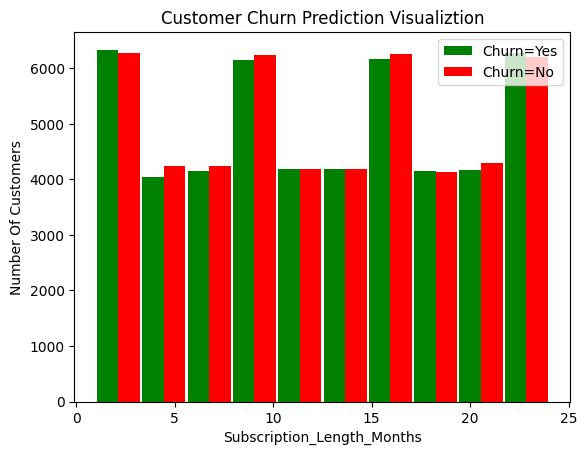

In [51]:
new_churn_no = df[df.Churn==0].Subscription_Length_Months
new_churn_yes = df[df.Churn==1].Subscription_Length_Months

plt.xlabel("Subscription_Length_Months")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([new_churn_yes, new_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# OneHotEncoder


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
a=df[['Location']]

In [12]:
a

,Location
0,Los Angeles
1,New York
2,Los Angeles
3,Miami
4,Miami
...,...
99995,Houston
99996,New York
99997,Chicago
99998,New York


In [13]:
ohe=OneHotEncoder()
encoded=ohe.fit_transform(a).toarray()
encoded

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [14]:
label_en=pd.DataFrame(encoded,columns=['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'])

In [15]:
label_en.head()

,Los Angeles,New York,Miami,Chicago,Houston
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [16]:
import pandas as pd


position = 5  # Index 
df4 = pd.concat([df.iloc[:, :position], label_en, df.iloc[:, position:]], axis=1)

In [17]:
df4

,CustomerID,Name,Age,Gender,Location,Los Angeles,New York,Miami,Chicago,Houston,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,0.0,0.0,1.0,0.0,0.0,17,73.36,236,0
1,2,Customer_2,62,Female,New York,0.0,0.0,0.0,0.0,1.0,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,0.0,0.0,1.0,0.0,0.0,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,0.0,0.0,0.0,1.0,0.0,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,0.0,0.0,0.0,1.0,0.0,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,0.0,1.0,0.0,0.0,0.0,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,0.0,0.0,0.0,0.0,1.0,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,1.0,0.0,0.0,0.0,0.0,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,0.0,0.0,0.0,0.0,1.0,20,49.25,434,1


In [18]:
df4['Gender'].replace({'Female':1,'Male':0},inplace=True)
# df4['Gender'].apply(lambda x: 1 if x == 'male' else 0)

In [19]:
df4.head()

,CustomerID,Name,Age,Gender,Location,Los Angeles,New York,Miami,Chicago,Houston,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,Los Angeles,0.0,0.0,1.0,0.0,0.0,17,73.36,236,0
1,2,Customer_2,62,1,New York,0.0,0.0,0.0,0.0,1.0,1,48.76,172,0
2,3,Customer_3,24,1,Los Angeles,0.0,0.0,1.0,0.0,0.0,5,85.47,460,0
3,4,Customer_4,36,1,Miami,0.0,0.0,0.0,1.0,0.0,3,97.94,297,1
4,5,Customer_5,46,1,Miami,0.0,0.0,0.0,1.0,0.0,19,58.14,266,0


In [20]:
Prepare_data=df4.copy()

In [21]:
Prepare_data.head()

,CustomerID,Name,Age,Gender,Location,Los Angeles,New York,Miami,Chicago,Houston,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,Los Angeles,0.0,0.0,1.0,0.0,0.0,17,73.36,236,0
1,2,Customer_2,62,1,New York,0.0,0.0,0.0,0.0,1.0,1,48.76,172,0
2,3,Customer_3,24,1,Los Angeles,0.0,0.0,1.0,0.0,0.0,5,85.47,460,0
3,4,Customer_4,36,1,Miami,0.0,0.0,0.0,1.0,0.0,3,97.94,297,1
4,5,Customer_5,46,1,Miami,0.0,0.0,0.0,1.0,0.0,19,58.14,266,0


In [22]:
columns_to_drop = ['Name', 'Location', 'CustomerID', 'Churn']
X=Prepare_data.drop(columns=columns_to_drop)
X.head()

,Age,Gender,Los Angeles,New York,Miami,Chicago,Houston,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,0,0.0,0.0,1.0,0.0,0.0,17,73.36,236
1,62,1,0.0,0.0,0.0,0.0,1.0,1,48.76,172
2,24,1,0.0,0.0,1.0,0.0,0.0,5,85.47,460
3,36,1,0.0,0.0,0.0,1.0,0.0,3,97.94,297
4,46,1,0.0,0.0,0.0,1.0,0.0,19,58.14,266


In [23]:
y=Prepare_data['Churn']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

# train and test split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=20)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 10), (20000, 10), (80000,), (20000,))

In [29]:
j=X_train.head(100)
k=y_train.head(100)

# ML model selection

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
    ,'GaussianNB':{
        'model':GaussianNB(),
        'params':{}
    }
    ,
    
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
             'criterion': ['gini','entropy'],
        }
        
    }
  ,
    'Knn' : {
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [3,5,8,22,7]
        }
    }
    
}



In [31]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df6 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df6

,model,best_score,best_params
0,svm,0.60,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.60,{'n_estimators': 5}
2,logistic_regression,0.52,{'C': 1}
3,GaussianNB,0.50,{}
4,DecisionTreeClassifier,0.56,{'criterion': 'gini'}
5,Knn,0.62,{'n_neighbors': 8}


In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [36]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
model.score(X_test,y_test)

0.50035

The accracu by the ML model are so less so now we start check with the Deel learnimg Model simple ANN model I make

# Deep learning

In [41]:
X.head()

,Age,Gender,Los Angeles,New York,Miami,Chicago,Houston,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,0,0.0,0.0,1.0,0.0,0.0,17,73.36,236
1,62,1,0.0,0.0,0.0,0.0,1.0,1,48.76,172
2,24,1,0.0,0.0,1.0,0.0,0.0,5,85.47,460
3,36,1,0.0,0.0,0.0,1.0,0.0,3,97.94,297
4,46,1,0.0,0.0,0.0,1.0,0.0,19,58.14,266


In [40]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

# MinMax Scaler

In [42]:
cols_to_scale = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [43]:
X.head()

,Age,Gender,Los Angeles,New York,Miami,Chicago,Houston,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0.865385,0,0.0,0.0,1.0,0.0,0.0,0.695652,0.619429,0.413333
1,0.846154,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.268000,0.271111
2,0.115385,1,0.0,0.0,1.0,0.0,0.0,0.173913,0.792429,0.911111
3,0.346154,1,0.0,0.0,0.0,1.0,0.0,0.086957,0.970571,0.548889
4,0.538462,1,0.0,0.0,0.0,1.0,0.0,0.782609,0.402000,0.480000


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [58]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6939 - accuracy: 0.4990
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.5026
Epoch 3/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5025
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4998
Epoch 5/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 6/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5018
Epoch 7/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 8/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.4992
Epoch 9/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5031
Epoch 10/100
2500/2500 [==============================] - 4s 2ms/step - l

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# Load your preprocessed data here
# data = pd.read_csv("your_data.csv")  # Replace "your_data.csv" with your actual file path

# # Split the data into features (X) and target (y)
# X = data.drop(columns=['Total_Usage_GB'])  # Features
# y = data['Total_Usage_GB']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # No activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# # Evaluate the model
# loss = model.evaluate(X_test_scaled, y_test)
# print("Test Loss:", loss)


Epoch 1/10
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2556 - accuracy: 0.5028 - val_loss: 0.2523 - val_accuracy: 0.5002
Epoch 2/10
2250/2250 [==============================] - 4s 2ms/step - loss: 0.2520 - accuracy: 0.5036 - val_loss: 0.2512 - val_accuracy: 0.4975
Epoch 3/10
2250/2250 [==============================] - 4s 2ms/step - loss: 0.2514 - accuracy: 0.5051 - val_loss: 0.2515 - val_accuracy: 0.4915
Epoch 4/10
2250/2250 [==============================] - 4s 2ms/step - loss: 0.2509 - accuracy: 0.5030 - val_loss: 0.2506 - val_accuracy: 0.4997
Epoch 5/10
2250/2250 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.5053 - val_loss: 0.2506 - val_accuracy: 0.5044
Epoch 6/10
2250/2250 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.5088 - val_loss: 0.2514 - val_accuracy: 0.5029
Epoch 7/10
2250/2250 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.5058 - val_loss: 0.2505 - val_accuracy:

In [52]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 1s 1ms/step - loss: 0.2510 - accuracy: 0.5039


[0.2510458528995514, 0.5039499998092651]

In [55]:
yp=model.predict(X_test)

625/625 [==============================] - 1s 1ms/step


In [56]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Classsification report

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10079
           1       0.00      0.00      0.00      9921

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.34     20000
weighted avg       0.25      0.50      0.34     20000



C:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
